<a href="https://colab.research.google.com/github/khushalbisani/Chest-X-Ray-Images--Pneumonia-/blob/master/Chest_xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import keras
import random
import skimage
import os
%matplotlib inline

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:          13022        2017        5483           0        5522       10760
Swap:             0           0           0


In [0]:
!ls "/content/drive/My Drive/Datasets/chest_xray"

chest_xray  chest_xray.zip  __MACOSX


In [0]:
os.chdir("/content/drive/My Drive/Datasets/chest_xray")

# !unzip chest_xray.zip

In [0]:
!ls "/content/drive/My Drive/Datasets/chest_xray/chest_xray"

np_array_test_x.npy  np_array_train_x.npy  np_array_val_x.npy  test   val
np_array_test_y.npy  np_array_train_y.npy  np_array_val_y.npy  train


In [0]:
path = "/content/drive/My Drive/Datasets/chest_xray/chest_xray/"

print("In train folder:-",os.listdir(path+"train"))
print("In test folder:-",os.listdir(path+"test"))
print("In validation folder:-",os.listdir(path+"val"))

In train folder:- ['NORMAL', 'PNEUMONIA', '.DS_Store']
In test folder:- ['.DS_Store', 'PNEUMONIA', 'NORMAL']
In validation folder:- ['NORMAL', '.DS_Store', 'PNEUMONIA']


In [0]:

normal_img = os.listdir(path+"train/NORMAL")
pneumonia_img = os.listdir(path+"train/PNEUMONIA")

---------NORMAL----------------PNEUMONIA----------


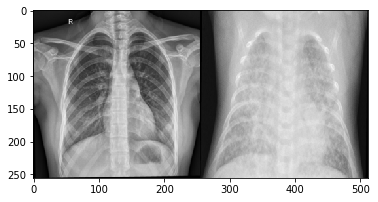

---------NORMAL----------------PNEUMONIA----------


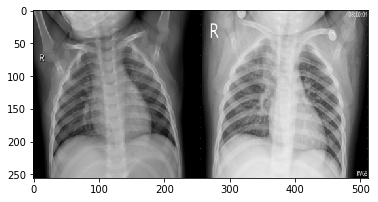

---------NORMAL----------------PNEUMONIA----------


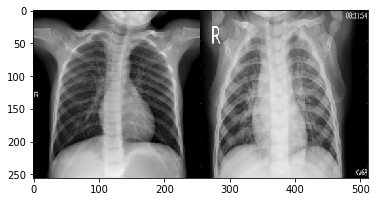

---------NORMAL----------------PNEUMONIA----------


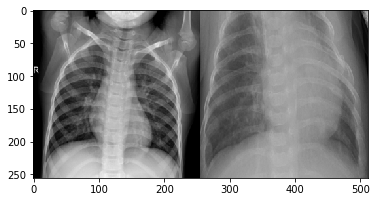

---------NORMAL----------------PNEUMONIA----------


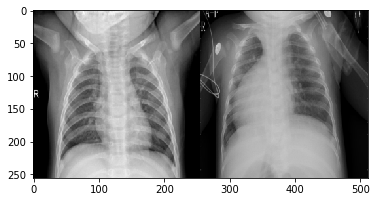

In [0]:

import skimage

for i in range(5):
  img1 = cv2.imread(path+"train/NORMAL/"+normal_img[i])
  img1 = skimage.transform.resize(img1,(256,256,3))
  
  img2 = cv2.imread(path+"train/PNEUMONIA/"+pneumonia_img[i])
  img2 = skimage.transform.resize(img2,(256,256,3))
  
  print("---------NORMAL----------------PNEUMONIA----------")
  con_img = np.concatenate((img1,img2),axis=1)
  plt.imshow(con_img)
  plt.show()

In [0]:
def label(fold):
  if str(fold)==str("NORMAL"):
    return [1,0]
  elif str(fold)==str("PNEUMONIA"):
    return [0,1]
  else:
    return [1,1]
  

In [0]:
def feature(file):
# img = Image.open(file)
# img = img.resize((256,256)) 
  img = cv2.imread(file)
  img = skimage.transform.resize(img , (128,128,3))
  ar = np.array(img)
  return ar

In [0]:
train = []
test = []
val = []

In [0]:
for fold in os.listdir(path):# train , test & val
  
  if(fold != ".DS_Store"):
    for sub_fold in os.listdir(path+fold): # sub folder (NORMAL & PNEUMONIA) of train , test & val
      
      if(sub_fold!=".DS_Store"):
        
        if(fold=="val"):
          for file in os.listdir(path+fold+"/"+sub_fold):
            if(file!=".DS_Store"):
              val.append((feature(path+fold+"/"+sub_fold+"/"+file),label(sub_fold)))
              
        elif(fold=="train"):
          for file in os.listdir(path+fold+"/"+sub_fold):
            if(file!=".DS_Store"):
              train.append((feature(path+fold+"/"+sub_fold+"/"+file),label(sub_fold)))
              
        else:
          for file in os.listdir(path+fold+"/"+sub_fold):
            if(file!=".DS_Store"):
              test.append((feature(path+fold+"/"+sub_fold+"/"+file),label(sub_fold)))
            
        
      

In [0]:
print(len(train))
print(len(test))
print(len(val))

In [0]:
tr = train
te = test
va = val

In [0]:
random.shuffle(train)
random.shuffle(test)
random.shuffle(val)

train_x , train_y = zip(*train)
test_x , test_y = zip(*test)
val_x , val_y = zip(*val)



In [0]:
train_x = np.array(train_x)
test_x = np.array(test_x)
val_x = np.array(val_x)

In [0]:
train_y = np.array(train_y)
test_y = np.array(test_y)
val_y = np.array(val_y)

In [0]:
np.save(path+"np_array_train_x.npy",train_x)
np.save(path+"np_array_train_y.npy",train_y)
np.save(path+"np_array_test_x.npy",test_x)
np.save(path+"np_array_test_y.npy",test_y)
np.save(path+"np_array_val_y.npy",val_y)
np.save(path+"np_array_val_x.npy",val_x)

In [0]:
train_x = np.load(path+"np_array_train_x.npy")
train_y = np.load(path+"np_array_train_y.npy")
test_x = np.load(path+"np_array_test_x.npy")
test_y = np.load(path+"np_array_test_y.npy")
val_y = np.load(path+"np_array_val_y.npy")
val_x = np.load(path+"np_array_val_x.npy")

In [0]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(val_x.shape)
print(val_y.shape)

(5216, 128, 128, 3)
(5216, 2)
(624, 128, 128, 3)
(624, 2)
(16, 128, 128, 3)
(16, 2)


In [0]:
from keras.models import Sequential
from keras.layers import Dense , MaxPool2D , Conv2D , Flatten , Dropout ,Activation

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

W0804 09:58:00.246455 140357265885056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 09:58:00.274010 140357265885056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 09:58:00.277155 140357265885056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0804 09:58:00.310751 140357265885056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0804 09:58:00.314575 140357265885056 deprecation_wrapp

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
__________

In [0]:
from keras.optimizers import Adam , SGD
adam = Adam(lr = 0.001 , amsgrad = True)
sgd = SGD(lr=0.01, momentum=0.9,nesterov=True)

In [0]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.0001)

In [0]:
model.compile(optimizer = sgd , loss = 'categorical_crossentropy', metrics = ['accuracy'])

W0804 09:58:00.512861 140357265885056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0804 09:58:00.528890 140357265885056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
epochs = 20
batch_size = 32

nb_train_sample = int(train_x.shape[0])
nb_val_sample = int(val_x.shape[0])

train_steps = nb_train_sample // batch_size
validation_steps = nb_val_sample // 8

In [0]:
print(nb_train_sample)
print(nb_val_sample)
print(train_steps)
print(validation_steps)

5216
16
163
2


In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
#                 featurewise_center=True,
#                 featurewise_std_normalization=True,
                rotation_range=20,
                width_shift_range=0.2,
                height_shift_range=0.2,
                zoom_range=0.2,
                shear_range=0.2)

validation_datagen = ImageDataGenerator(
#                 featurewise_center=True,
#                 featurewise_std_normalization=True,
                rotation_range=20,
                width_shift_range=0.2,
                height_shift_range=0.2,
                zoom_range=0.2,
                shear_range=0.2)

In [0]:
train_generator = train_datagen.flow(train_x , train_y , batch_size = batch_size)
validation_generator = validation_datagen.flow(val_x , val_y , batch_size = 8)

In [0]:
history = model.fit_generator(train_generator , 
                             steps_per_epoch = train_steps,
                             epochs = epochs,
                             validation_data = validation_generator,
                             validation_steps = validation_steps,
                             callbacks = [learning_rate_reduction]
                             )

W0804 09:58:01.462666 140357265885056 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
163/163 [==============================] - 24s 149ms/step - loss: 0.5805 - acc: 0.7406 - val_loss: 0.8441 - val_acc: 0.5000
Epoch 2/20
163/163 [==============================] - 20s 122ms/step - loss: 0.5228 - acc: 0.7590 - val_loss: 0.7204 - val_acc: 0.6250
Epoch 3/20
163/163 [==============================] - 20s 121ms/step - loss: 0.4630 - acc: 0.7711 - val_loss: 0.7525 - val_acc: 0.6250
Epoch 4/20
163/163 [==============================] - 20s 122ms/step - loss: 0.3980 - acc: 0.8163 - val_loss: 0.9881 - val_acc: 0.5625
Epoch 5/20
163/163 [==============================] - 20s 123ms/step - loss: 0.3793 - acc: 0.8390 - val_loss: 0.9163 - val_acc: 0.5625

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.
Epoch 6/20
163/163 [==============================] - 20s 120ms/step - loss: 0.3301 - acc: 0.8600 - val_loss: 0.8945 - val_acc: 0.5625
Epoch 7/20
163/163 [==============================] - 20s 121ms/step - loss: 0.3164 - acc: 0.8700 - val_loss:

In [0]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


In [0]:
model.evaluate_generator(train_generator,train_steps)

[0.26399118041882486, 0.8912960122699386]

In [0]:
model.evaluate_generator(validation_generator,validation_steps)

[0.808836966753006, 0.6875]

In [0]:
model.evaluate(test_x,test_y,batch_size = batch_size)

624/624 [==============================] - 1s 1ms/step


[0.4985387447552803, 0.7403846153846154]

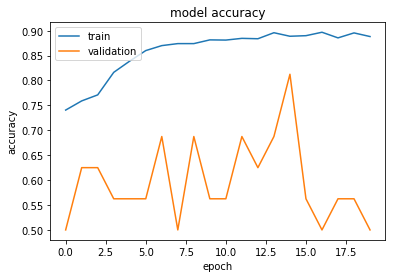

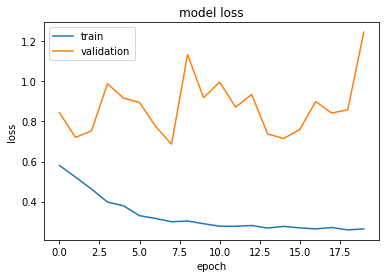

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:

pred = model.predict(test_x)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(test_y,axis = 1)

In [0]:
# print(pred)
# print(y_true)

In [0]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

CM = confusion_matrix(y_true, pred)
print(CM)

[[ 97 137]
 [ 25 365]]


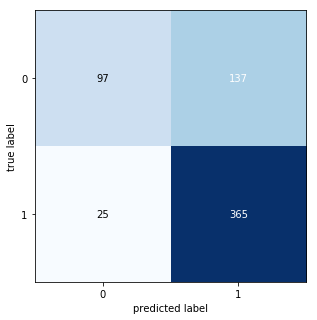

In [0]:
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()